#Video 6; DS pipeline with pandas, seaborn, scikit-learn

In [2]:
import pandas as pd

In [10]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
# check the shape of the DataFrame (rows, columns)
data.shape
#a single column is a pandas series

(200, 4)



What are the features?

    TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
    Radio: advertising dollars spent on Radio
    Newspaper: advertising dollars spent on Newspaper

What is the response?

    Sales: sales of a single product in a given market (in thousands of items)

What else do we know?

    Because the response variable is continuous, this is a regression problem.
    There are 200 observations (represented by the rows), and each observation is a single market.


###Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

    Anaconda users: run conda install seaborn from the command line

In [14]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

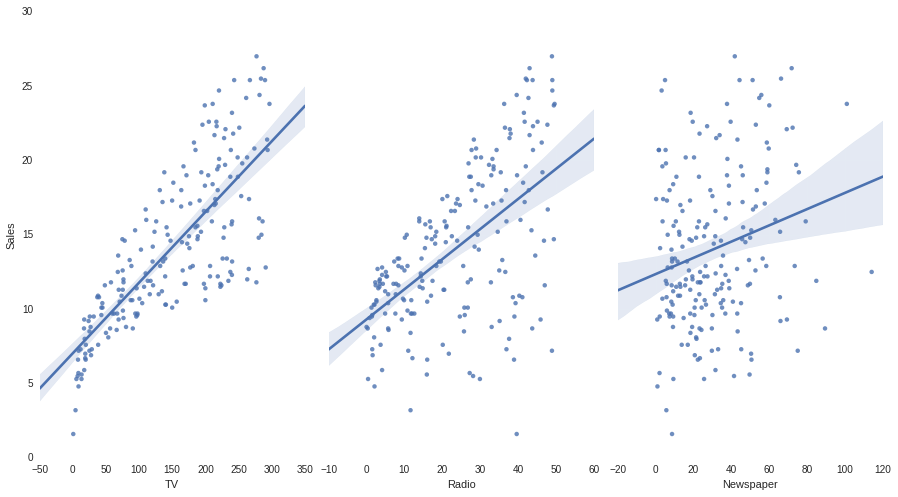

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.6,kind='reg')

###Preparing X and y using pandas

    -scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
    
    -However, pandas is built on top of NumPy.
    
    -Thus, X can be a pandas DataFrame and y can be a pandas Series!


In [25]:
# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [26]:
# check the type and shape of X
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [29]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [31]:
# check the type and shape of y
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


###Splitting X and y into training and testing sets

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
# default split is 75% for training and 25% for testing
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


###Linear regression in scikit-learn

In [35]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

###interpreting model coefficients

In [36]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [37]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150253),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804621)]

How do we interpret the TV coefficient (0.0466)?

   -For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
    
   -Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional  \beta_1$ would be negative.
   
###Making predictions


In [38]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

##Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [42]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

###Mean Absolute Error (MAE) is the mean of the absolute value of the errors:


In [44]:
#It is the average error
# calculate MAE by hand
print (10 + 0 + 20 + 10)/4.

# calculate MAE using scikit-learn
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)
#get the differnce between the true and predicted values and get the avergae.

10.0
10.0


###Mean Squared Error (MSE) is the mean of the squared errors:

In [45]:
# calculate MSE by hand
print (10**2 + 0**2 + 20**2 + 10**2)/4.

# calculate MSE using scikit-learn
print metrics.mean_squared_error(true, pred)

150.0
150.0


###Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [47]:
# calculate RMSE by hand
import numpy as np
print np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate RMSE using scikit-learn
print np.sqrt(metrics.mean_squared_error(true, pred))
#increases the weights of larger errors

12.2474487139
12.2474487139


-**MAE** is the easiest to understand, because it's the average error.

-**MSE** is more popular than MAE, because MSE "punishes" larger errors.

-**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

###Computing the RMSE for our Sales predictions

In [48]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


###Feature selection

In [50]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


The **RMSE decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.